In [ ]:
#importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
from keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

vehicle_classes = [0, 1, 8, 9]  # airplane, automobile, truck, ship
animal_classes = [3, 5, 4, 6, 7, 2]  # cat, dog, deer, frog, horse, bird

y_train_vehicle = np.isin(y_train, vehicle_classes).astype(int)
y_test_vehicle = np.isin(y_test, vehicle_classes).astype(int)


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Resize images
SIZE = 32
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
# Capture training data and labels into respective lists
for i in range(len(X_train)):
    img = cv2.resize(X_train[i], (SIZE, SIZE))
    train_images.append(img)
    train_labels.append(y_train_vehicle[i])

In [ ]:
# Convert lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# Capture test/validation data and labels into respective lists
test_images = []
test_labels = []

for i in range(len(X_test)):
    img = cv2.resize(X_test[i], (SIZE, SIZE))
    test_images.append(img)
    test_labels.append(y_test_vehicle[i])

In [ ]:
# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
# Count the number of images for each class in train data
train_class_counts = dict(zip(*np.unique(train_labels, return_counts=True)))
print(train_class_counts)

{0: 30000, 1: 20000}


In [ ]:
# Count the number of images for each class in test data
test_class_counts = dict(zip(*np.unique(test_labels, return_counts=True)))
print(test_class_counts)


{0: 6000, 1: 4000}


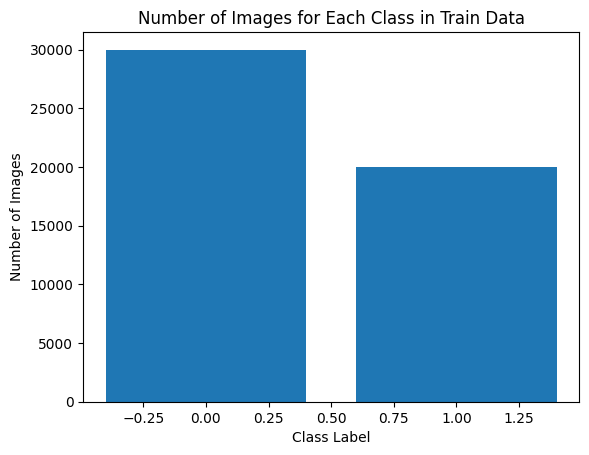

In [ ]:
# Create a bar chart for the number of images for each class in train data
train_class_counts = dict(zip(*np.unique(train_labels, return_counts=True)))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Number of Images for Each Class in Train Data")
plt.show()

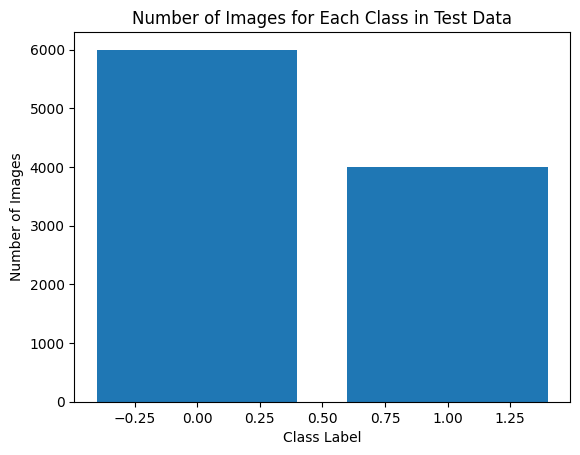

In [ ]:
# Create a bar chart for the number of images for each class in test data
test_class_counts = dict(zip(*np.unique(test_labels, return_counts=True)))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Number of Images for Each Class in Test Data")
plt.show()


#Preprocessing

In [ ]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [ ]:
# Perform dimensionality reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

In [ ]:
# One-hot encode the labels
#label_encoder = LabelEncoder()
#train_labels_encoded = label_encoder.fit_transform(train_labels)
#test_labels_encoded = label_encoder.transform(test_labels)
#print(test_labels_encoded)


from keras.utils import to_categorical

# One-hot encode the labels
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)
print(test_labels_encoded)


[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


#CNN Classifier

#1st Hyper Parameter with Epoch=10

In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the CNN model and save the history
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 635s 806ms/step - loss: 0.2815 - accuracy: 0.8875 - val_loss: 0.4078 - val_accuracy: 0.8348
Epoch 2/10
782/782 [==============================] - 638s 815ms/step - loss: 0.1950 - accuracy: 0.9223 - val_loss: 0.1609 - val_accuracy: 0.9351
Epoch 3/10
782/782 [==============================] - 620s 792ms/step - loss: 0.1666 - accuracy: 0.9342 - val_loss: 0.2012 - val_accuracy: 0.9149
Epoch 4/10
782/782 [==============================] - 580s 742ms/step - loss: 0.1491 - accuracy: 0.9427 - val_loss: 0.1596 - val_accuracy: 0.9371
Epoch 5/10
782/782 [==============================] - 508s 649ms/step - loss: 0.1329 - accuracy: 0.9483 - val_loss: 0.1642 - val_accuracy: 0.9345
Epoch 6/10
782/782 [==============================] - 527s 674ms/step - loss: 0.1218 - accuracy: 0.9525 - val_loss: 0.1352 - val_accuracy: 0.9496
Epoch 7/10
782/782 [==============================] - 507s 648ms/step - loss: 0.1126 - accuracy: 0.9570 - val_loss: 0.1123 -

In [ ]:
# Save the trained model
model.save("my_model.h5")

In [ ]:
# Access the accuracy and loss values from the history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 37s 117ms/step - loss: 0.1049 - accuracy: 0.9619
Test Loss: 0.10494790971279144
Test Accuracy: 0.961899995803833


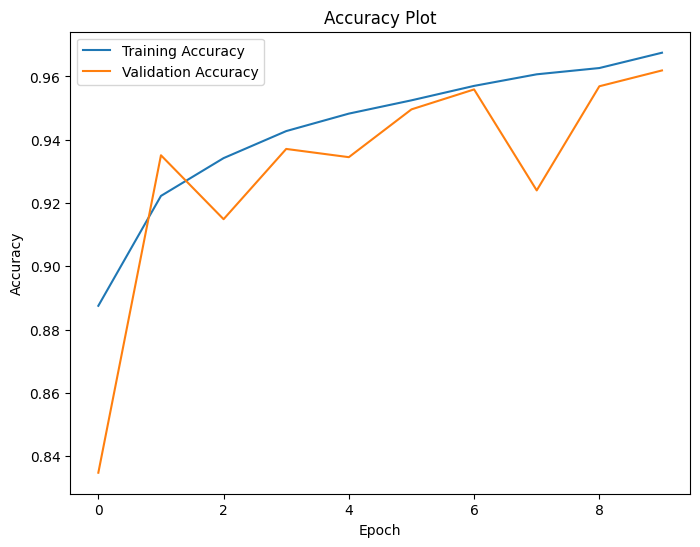

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

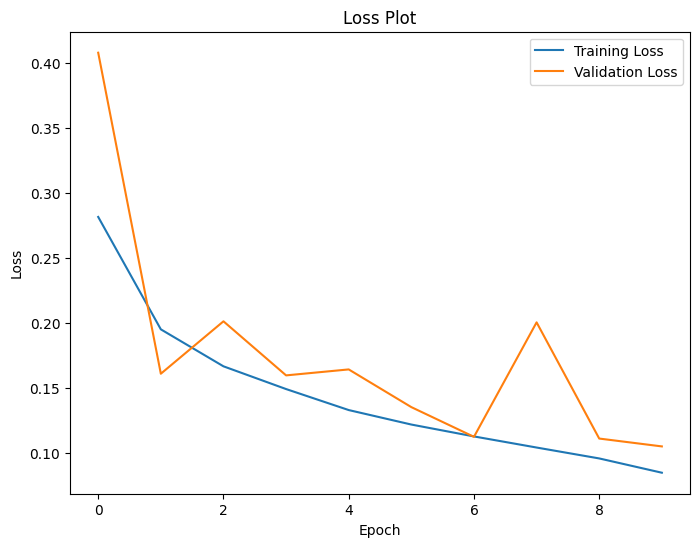

In [ ]:
# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 26s 79ms/step


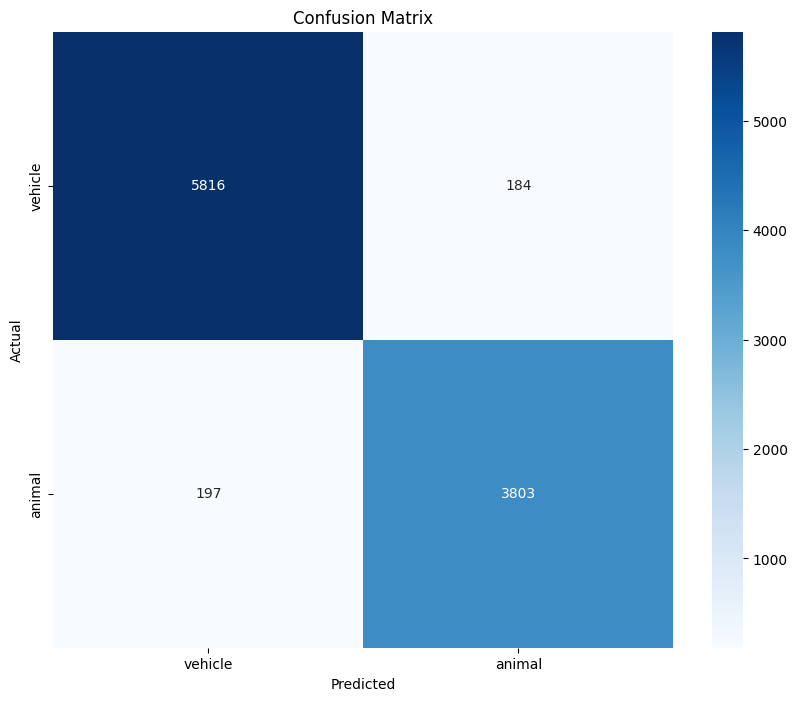

In [ ]:
# Generate confusion matrix
y_pred_probs = model.predict(test_images)
y_pred = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9618825960690222
Recall: 0.9619
F1 Score: 0.9618896085311193


In [ ]:
!pip install -U gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [ ]:
import gradio as gr

In [ ]:
from keras.models import load_model

# Load the saved model
model = load_model("my_model.h5")


In [ ]:
# Define a function to preprocess the image
def preprocess_image(image):
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0
    return image

In [ ]:
# Define a function to make predictions
def predict_image(image):
    preprocessed_image = preprocess_image(image)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    prediction_prob = model.predict(preprocessed_image)[0]
    prediction = (prediction_prob > 0.5).astype(int)[0]
    predicted_label = "vehicle" if prediction == 1 else "animal"
    return predicted_label

In [ ]:
# Define the Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.inputs.Image(shape=(32, 32)),
    outputs="text",
    title="CIFAR-10 Image Classifier",
    description="Upload an image and the model will predict its label.",
    allow_flagging=False
)

# Launch the interface
iface.launch()

<ipython-input-32-22f229598fb3>:4: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Image(shape=(32, 32)),
<ipython-input-32-22f229598fb3>:4: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Image(shape=(32, 32)),
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:332: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

#2nd Hyper Parameter with Epoch=6

In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the CNN model and save the history
history = model.fit(train_images, train_labels, batch_size=64, epochs=6, validation_data=(test_images, test_labels))

Epoch 1/6
782/782 [==============================] - 545s 693ms/step - loss: 0.2739 - accuracy: 0.8939 - val_loss: 0.2215 - val_accuracy: 0.9152
Epoch 2/6
782/782 [==============================] - 546s 698ms/step - loss: 0.1882 - accuracy: 0.9261 - val_loss: 0.2129 - val_accuracy: 0.9161
Epoch 3/6
782/782 [==============================] - 551s 705ms/step - loss: 0.1639 - accuracy: 0.9358 - val_loss: 0.1418 - val_accuracy: 0.9430
Epoch 4/6
782/782 [==============================] - 544s 696ms/step - loss: 0.1460 - accuracy: 0.9433 - val_loss: 0.1427 - val_accuracy: 0.9454
Epoch 5/6
782/782 [==============================] - 542s 693ms/step - loss: 0.1316 - accuracy: 0.9490 - val_loss: 0.1418 - val_accuracy: 0.9436
Epoch 6/6
782/782 [==============================] - 525s 671ms/step - loss: 0.1214 - accuracy: 0.9532 - val_loss: 0.1479 - val_accuracy: 0.9403


In [ ]:
# Save the trained model
model.save("my_model.h5")

In [ ]:
# Access the accuracy and loss values from the history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 24s 77ms/step - loss: 0.1479 - accuracy: 0.9403
Test Loss: 0.1478639841079712
Test Accuracy: 0.9402999877929688


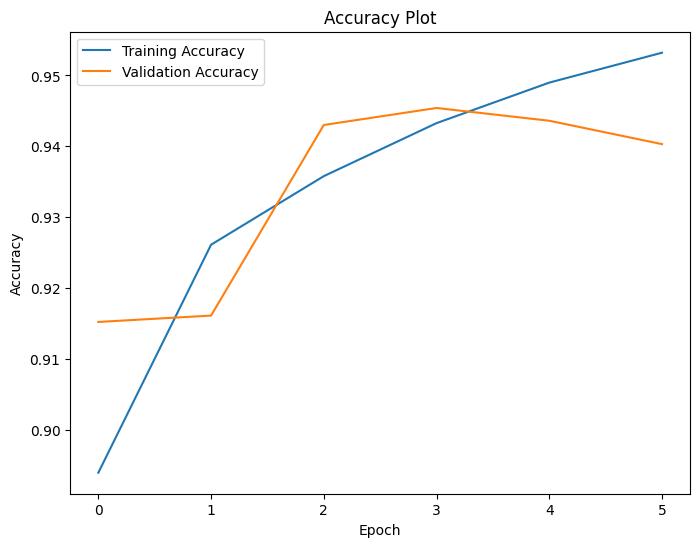

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

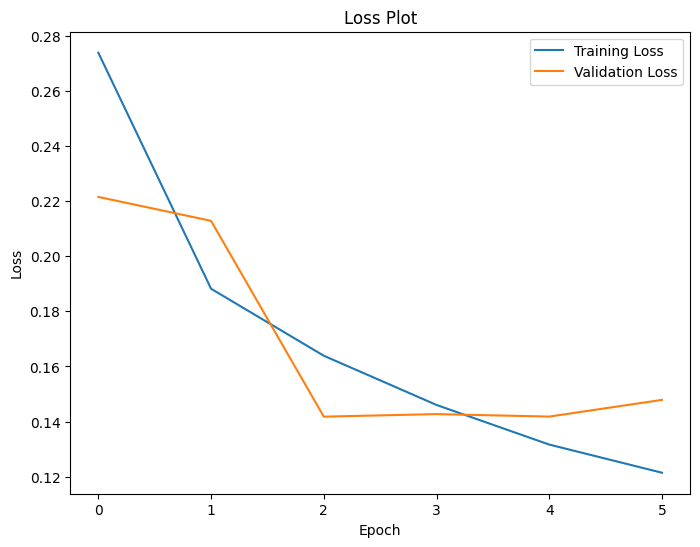

In [ ]:
# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 23s 72ms/step


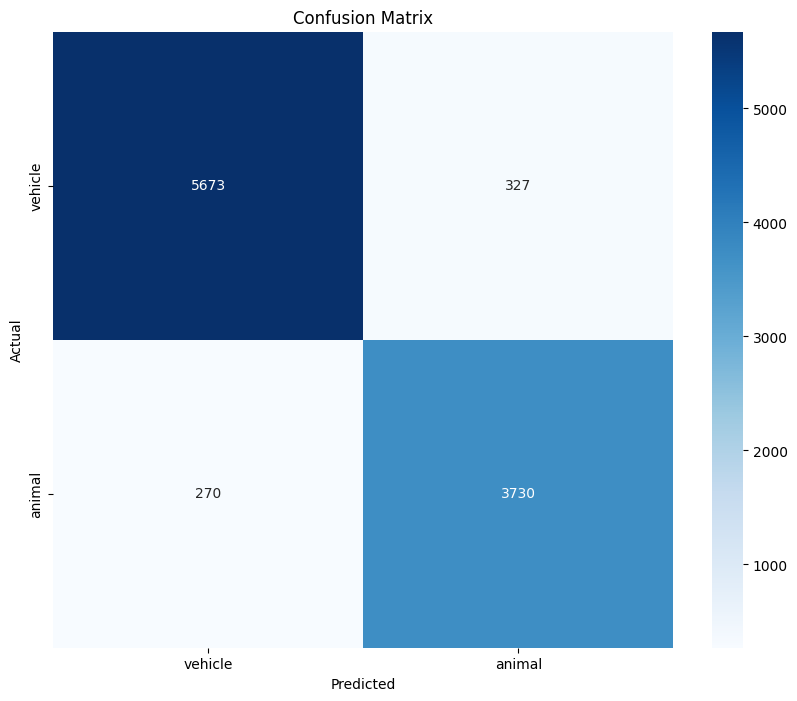

In [ ]:
# Generate confusion matrix
y_pred_probs = model.predict(test_images)
y_pred = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9405004680277274
Recall: 0.9403
F1 Score: 0.940368712411633


1/1 [==============================] - 0s 40ms/step


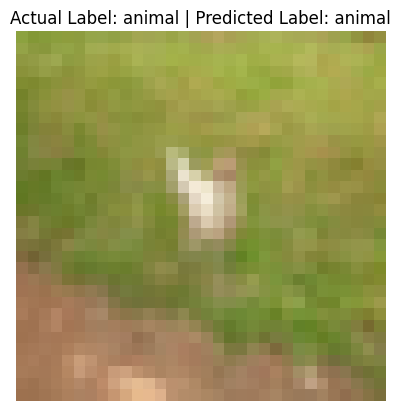

In [ ]:
import random

# Define the number of images to display
num_images = 1

# Iterate over the random indices
for _ in range(num_images):
    i = random.choice(range(len(test_images)))
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    flattened_img = resized_img.reshape(-1)

    # Make prediction using the CNN model
    prediction_prob = model.predict(np.expand_dims(resized_img, axis=0))[0]
    prediction = (prediction_prob > 0.5).astype(int)[0]

    # Map the predicted label to the corresponding class
    predicted_label = "vehicle" if prediction == 1 else "animal"

    # Map the actual label to the corresponding class
    actual_label = "vehicle" if label == 1 else "animal"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()

#3rd Hyper Parameter with Epoch=2

In [ ]:
# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN model and save the history
history = model.fit(train_images, train_labels, batch_size=64, epochs=2, validation_data=(test_images, test_labels))

Epoch 1/2
782/782 [==============================] - 553s 703ms/step - loss: 0.2793 - accuracy: 0.8892 - val_loss: 0.2378 - val_accuracy: 0.9042
Epoch 2/2
782/782 [==============================] - 552s 705ms/step - loss: 0.1918 - accuracy: 0.9232 - val_loss: 0.1852 - val_accuracy: 0.9256


In [ ]:
# Save the trained model
model.save("my_model.h5")

In [ ]:
# Access the accuracy and loss values from the history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 23s 73ms/step - loss: 0.1852 - accuracy: 0.9256
Test Loss: 0.1851930469274521
Test Accuracy: 0.925599992275238


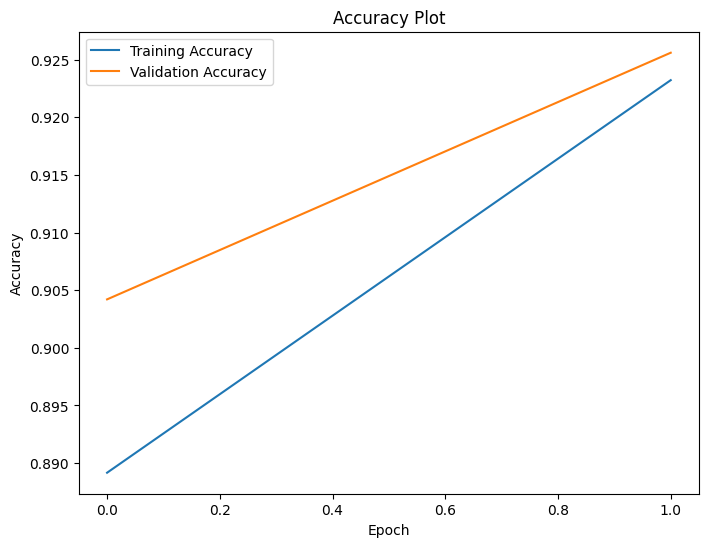

In [ ]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

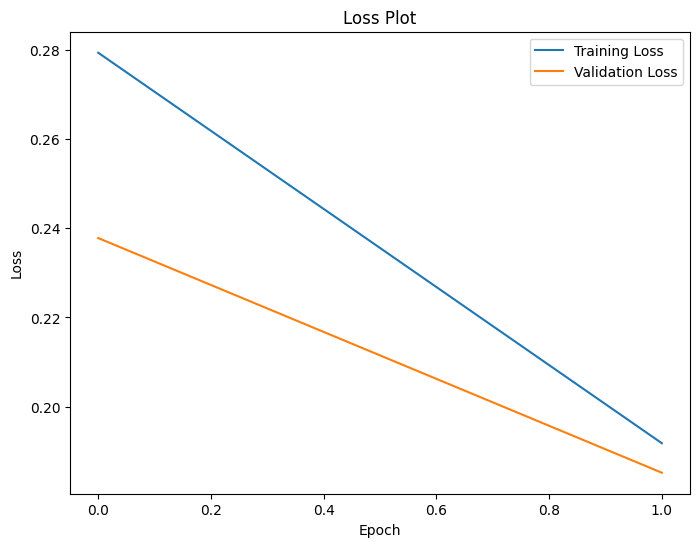

In [ ]:
# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 24s 77ms/step


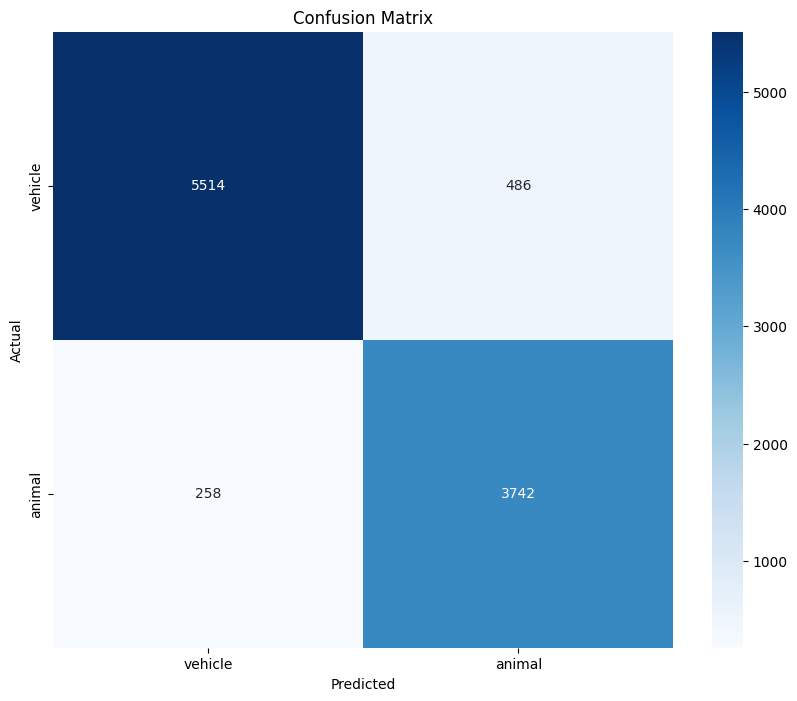

In [ ]:
# Generate confusion matrix
y_pred_probs = model.predict(test_images)
y_pred = (y_pred_probs > 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4929578412570237
Recall: 0.5969
F1 Score: 0.45401285639773603


1/1 [==============================] - 0s 61ms/step


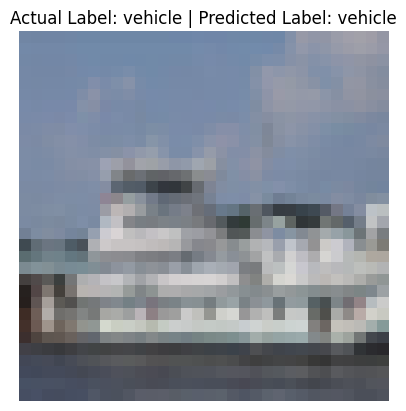

In [ ]:
import random

# Define the number of images to display
num_images = 1

# Iterate over the random indices
for _ in range(num_images):
    i = random.choice(range(len(test_images)))
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    flattened_img = resized_img.reshape(-1)

    # Make prediction using the CNN model
    prediction_prob = model.predict(np.expand_dims(resized_img, axis=0))[0]
    prediction = (prediction_prob > 0.5).astype(int)[0]

    # Map the predicted label to the corresponding class
    predicted_label = "vehicle" if prediction == 1 else "animal"

    # Map the actual label to the corresponding class
    actual_label = "vehicle" if label == 1 else "animal"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()

# Random Forest Classifier

#1st hyper parameter (n_estimators=1000, random_state=200)

In [ ]:
# Create Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=200)

In [ ]:
# Train the Random Forest model
rf_model.fit(train_images_flat, train_labels_encoded)


RandomForestClassifier(n_estimators=1000, random_state=200)

In [ ]:
# Predict on test data
y_pred = rf_model.predict(test_images_flat)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels_encoded, y_pred)

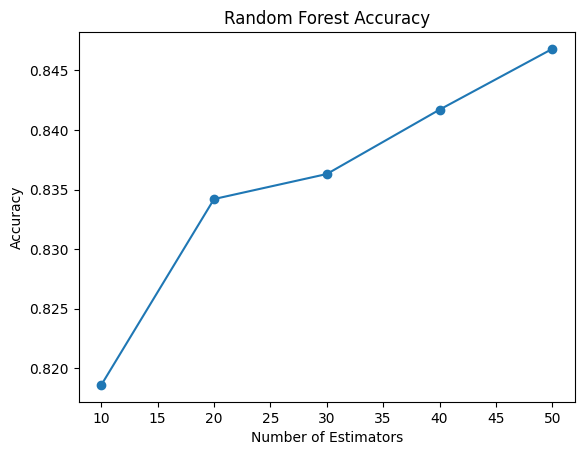

In [ ]:
# Define the range of estimators (trees) to test
num_estimators_range = [10, 20, 30, 40, 50]

accuracies = []

# Train and evaluate Random Forest models for each number of estimators
for num_estimators in num_estimators_range:
    # Create Random Forest classifier with the current number of estimators
    rf_model = RandomForestClassifier(n_estimators=num_estimators)

    # Train the Random Forest model
    rf_model.fit(train_images_flat, train_labels_encoded)

    # Predict on test data
    y_pred = rf_model.predict(test_images_flat)

    # Calculate accuracy and add it to the accuracies list
    accuracy = accuracy_score(test_labels_encoded, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. number of estimators
plt.plot(num_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

Iteration 1: MSE = 0.011586779800448897
Iteration 2: MSE = 0.011288095176348576
Iteration 3: MSE = 0.012633891527688729
Iteration 4: MSE = 0.012681110530879629
Iteration 5: MSE = 0.011186948436365191
Iteration 6: MSE = 0.011874211864313623
Iteration 7: MSE = 0.010998483689675195
Iteration 8: MSE = 0.012039539092885363
Iteration 9: MSE = 0.011262874882204652
Iteration 10: MSE = 0.011954945003683114
Iteration 11: MSE = 0.011736763708679179
Iteration 12: MSE = 0.011604957107155004
Iteration 13: MSE = 0.012236719185444625
Iteration 14: MSE = 0.011177310007334275
Iteration 15: MSE = 0.01034396285851555
Iteration 16: MSE = 0.01197021145033401
Iteration 17: MSE = 0.010877072837424204
Iteration 18: MSE = 0.012363431460798152
Iteration 19: MSE = 0.011699596166356758
Iteration 20: MSE = 0.011450130709074247
Iteration 21: MSE = 0.01126781638391897
Iteration 22: MSE = 0.010843627265131495
Iteration 23: MSE = 0.011923687878160207
Iteration 24: MSE = 0.012091049442185493
Iteration 25: MSE = 0.011538

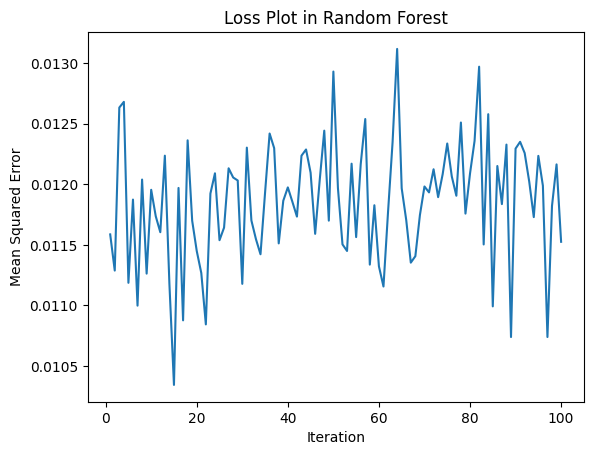

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=100)

# Lists to store the loss values
loss_values = []

# Train the random forest and calculate the loss at each iteration
for i in range(rf.n_estimators):
    rf.fit(X, y)
    y_pred = rf.predict(X)
    loss = mean_squared_error(y, y_pred)
    loss_values.append(loss)
    print(f"Iteration {i+1}: MSE = {loss}")

# Plot the loss values
plt.plot(range(1, len(loss_values)+1), loss_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Plot in Random Forest')
plt.show()

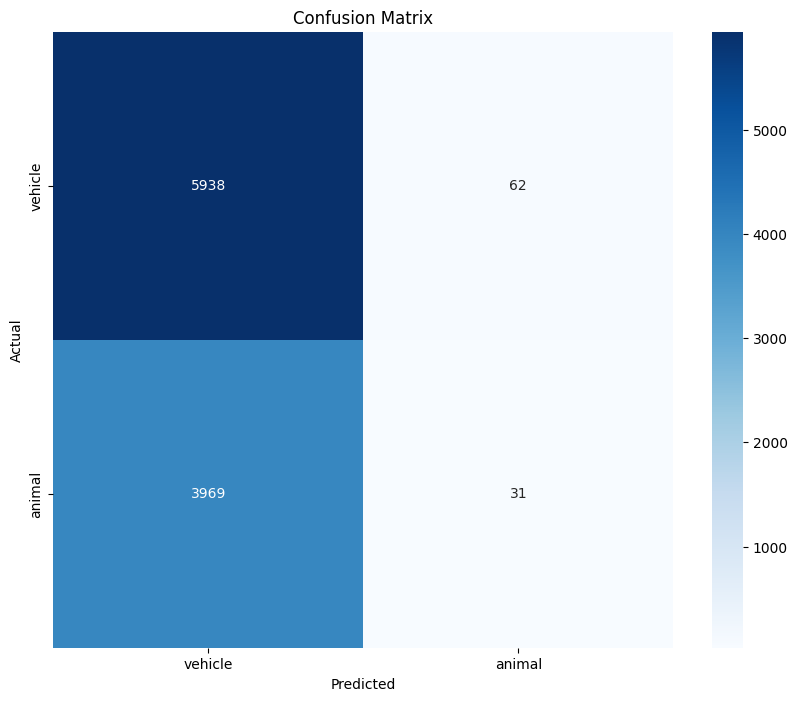

In [ ]:
# Generate confusion matrix
#cm = confusion_matrix(test_labels_encoded, y_pred)
#plt.figure(figsize=(10, 8))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

# Generate confusion matrix
#cm = confusion_matrix(test_labels, y_pred)
#plt.figure(figsize=(10, 8))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

# Convert one-hot encoded labels to their original format
test_labels = np.argmax(test_labels_encoded, axis=1)

# Predict on test data
y_pred = rf_model.predict(test_images_flat)

# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
print("test_labels_encoded shape:", test_labels_encoded.shape)
print("y_pred shape:", y_pred.shape)


test_labels_encoded shape: (10000, 2)
y_pred shape: (10000,)


In [ ]:
# Compute additional evaluation metrics
#precision = precision_score(test_labels_encoded, y_pred, average='weighted')
#recall = recall_score(test_labels_encoded, y_pred, average='weighted')
#f1 = f1_score(test_labels_encoded, y_pred, average='weighted')
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1 Score:", f1)

# Convert one-hot encoded labels to their original format
test_labels = np.argmax(test_labels_encoded, axis=1)

# Predict on test data
y_pred = rf_model.predict(test_images_flat)

# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.4929578412570237
Recall: 0.5969
F1 Score: 0.45401285639773603


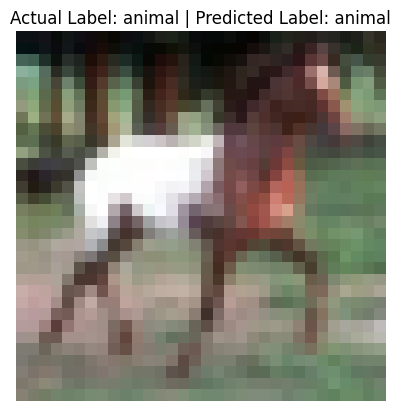

In [ ]:
import random

# Define the number of images to display
num_images = 1

# Iterate over the random indices
for _ in range(num_images):
    i = random.choice(range(len(test_images)))
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    flattened_img = resized_img.reshape(-1)

    # Make prediction using the Random Forest model
    prediction = rf_model.predict([flattened_img])[0]

    # Map the predicted label to the corresponding class
    predicted_label = "vehicle" if prediction == 1 else "animal"

    # Map the actual label to the corresponding class
    actual_label = "vehicle" if label == 1 else "animal"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()


# 2nd hyper parameter (n_estimators=900, random_state=150)

In [ ]:
# Create Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=900, random_state=150)

In [ ]:
# Train the Random Forest model
rf_model.fit(train_images_flat, train_labels_encoded)

1/1 [==============================] - 0s 44ms/step


RandomForestClassifier(n_estimators=900, random_state=150)

In [ ]:
# Predict on test data
y_pred = rf_model.predict(test_images_flat)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8573


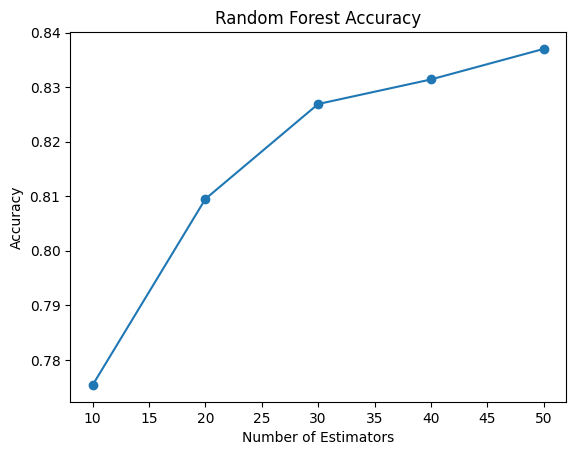

In [ ]:
# Define the range of estimators (trees) to test
num_estimators_range = [10, 20, 30, 40, 50]

accuracies = []

# Train and evaluate Random Forest models for each number of estimators
for num_estimators in num_estimators_range:
    # Create Random Forest classifier with the current number of estimators
    rf_model = RandomForestClassifier(n_estimators=num_estimators)

    # Train the Random Forest model
    rf_model.fit(train_images_flat, train_labels_encoded)

    # Predict on test data
    y_pred = rf_model.predict(test_images_flat)

    # Calculate accuracy and add it to the accuracies list
    accuracy = accuracy_score(test_labels_encoded, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. number of estimators
plt.plot(num_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

Iteration 1: MSE = 0.014396628245406462
Iteration 2: MSE = 0.015125807176869519
Iteration 3: MSE = 0.014228795237343272
Iteration 4: MSE = 0.01457675654012683
Iteration 5: MSE = 0.015000249989401129
Iteration 6: MSE = 0.015249584144813411
Iteration 7: MSE = 0.01423128363280749
Iteration 8: MSE = 0.014732350785888628
Iteration 9: MSE = 0.01566471499306125
Iteration 10: MSE = 0.016047069642454566
Iteration 11: MSE = 0.014318886915203822
Iteration 12: MSE = 0.01404155196076138
Iteration 13: MSE = 0.015461890004958392
Iteration 14: MSE = 0.014373834226239238
Iteration 15: MSE = 0.014646773001069837
Iteration 16: MSE = 0.016130845329498714
Iteration 17: MSE = 0.014899528990481265
Iteration 18: MSE = 0.015745336163772862
Iteration 19: MSE = 0.015353346566406113
Iteration 20: MSE = 0.01506291383604345
Iteration 21: MSE = 0.01514862926005815
Iteration 22: MSE = 0.014358007246838141
Iteration 23: MSE = 0.014847027020396754
Iteration 24: MSE = 0.014774786398622597
Iteration 25: MSE = 0.014824345

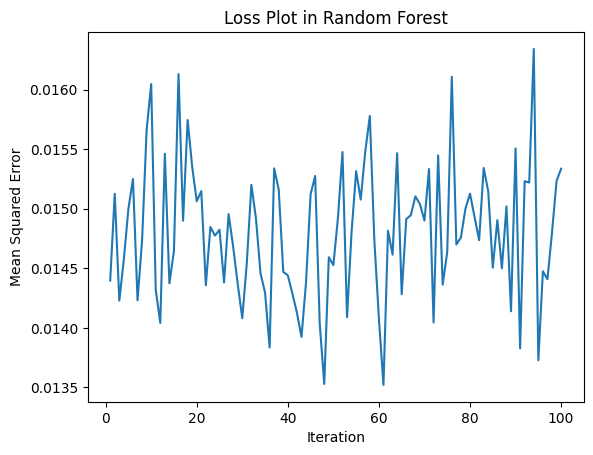

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=100)

# Lists to store the loss values
loss_values = []

# Train the random forest and calculate the loss at each iteration
for i in range(rf.n_estimators):
    rf.fit(X, y)
    y_pred = rf.predict(X)
    loss = mean_squared_error(y, y_pred)
    loss_values.append(loss)
    print(f"Iteration {i+1}: MSE = {loss}")

# Plot the loss values
plt.plot(range(1, len(loss_values)+1), loss_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Plot in Random Forest')
plt.show()

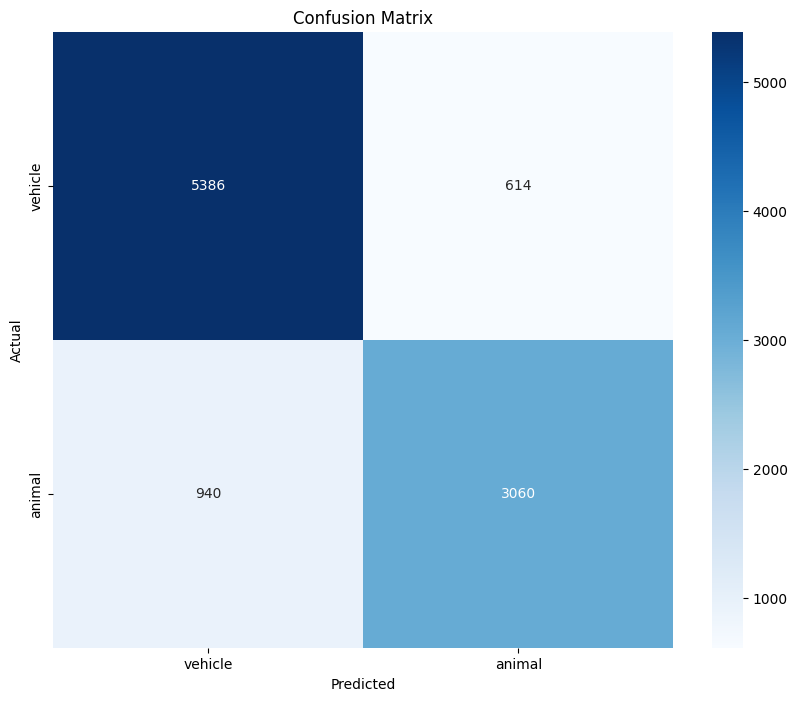

In [ ]:
# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Convert one-hot encoded labels to their original format
test_labels = np.argmax(test_labels_encoded, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8439960133766324
Recall: 0.8446
F1 Score: 0.8433542400440877


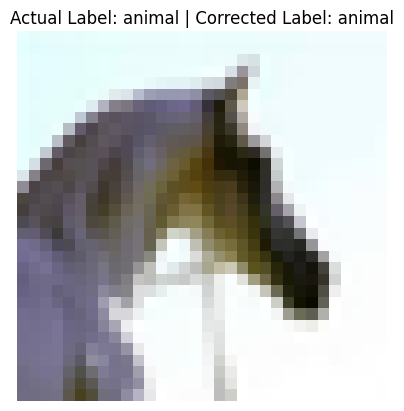

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images to display
num_images = 1

# Iterate over the random indices
for _ in range(num_images):
    i = random.choice(range(len(test_images)))
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    flattened_img = resized_img.reshape(-1)

    # Make prediction using the Random Forest model
    prediction = rf_model.predict([flattened_img])[0]

    # Map the predicted label to the corresponding class
    predicted_label = "vehicle" if np.any(prediction == 1) else "animal"

    # Map the actual label to the corresponding class
    actual_label = "vehicle" if label == 1 else "animal"

    # Correct misclassification if animal is classified as vehicle
    if predicted_label == "vehicle" and actual_label == "animal":
        predicted_label = "animal"

    # Display the image with the corrected labels
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()


# 3rd hyper parameter (n_estimators=800, random_state=200)

In [ ]:
# Create Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=800, random_state=200)

In [ ]:
# Train the Random Forest model
rf_model.fit(train_images_flat, train_labels_encoded)

RandomForestClassifier(n_estimators=800, random_state=200)

In [ ]:
# Convert one-hot encoded labels to their original format
test_labels = np.argmax(test_labels_encoded, axis=1)
# Predict on test data
y_pred = rf_model.predict(test_images_flat)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8559


In [ ]:
# Define the range of estimators (trees) to test
num_estimators_range = [10, 20, 30, 40, 50]

accuracies = []

# Train and evaluate Random Forest models for each number of estimators
for num_estimators in num_estimators_range:
    # Create Random Forest classifier with the current number of estimators
    rf_model = RandomForestClassifier(n_estimators=num_estimators)

    # Train the Random Forest model
    rf_model.fit(train_images_flat, train_labels_encoded)

    # Predict on test data
    y_pred = rf_model.predict(test_images_flat)

    # Calculate accuracy and add it to the accuracies list
    accuracy = accuracy_score(test_labels_encoded, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. number of estimators
plt.plot(num_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

KeyboardInterrupt: ignored

Iteration 1: MSE = 0.016413168775094245
Iteration 2: MSE = 0.015433341584605062
Iteration 3: MSE = 0.015071887824851445
Iteration 4: MSE = 0.015378955728328036
Iteration 5: MSE = 0.015998886356970186
Iteration 6: MSE = 0.016023465490250667
Iteration 7: MSE = 0.01616061052838163
Iteration 8: MSE = 0.0151602821908979
Iteration 9: MSE = 0.014618972616636871
Iteration 10: MSE = 0.015190308308913422
Iteration 11: MSE = 0.015923389449814567
Iteration 12: MSE = 0.016071529599882582
Iteration 13: MSE = 0.016850206869792432
Iteration 14: MSE = 0.015639135794279575
Iteration 15: MSE = 0.015756579622305054
Iteration 16: MSE = 0.01478912985528385
Iteration 17: MSE = 0.015709965161454856
Iteration 18: MSE = 0.01735568562974765
Iteration 19: MSE = 0.01517937282678269
Iteration 20: MSE = 0.01637376900171742
Iteration 21: MSE = 0.015718417962028646
Iteration 22: MSE = 0.014999046042345037
Iteration 23: MSE = 0.015520422965873798
Iteration 24: MSE = 0.015244606755753082
Iteration 25: MSE = 0.0162972144

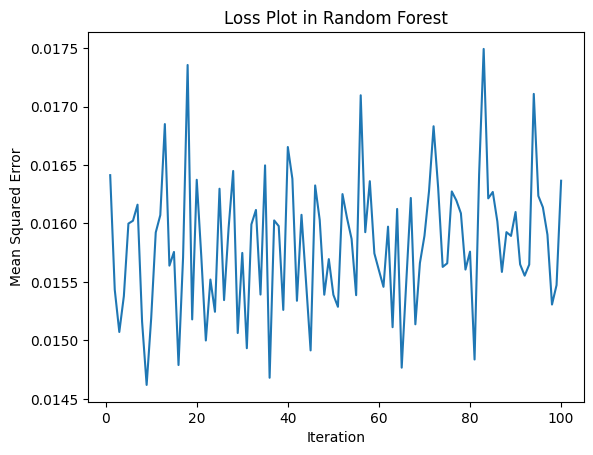

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=100)

# Lists to store the loss values
loss_values = []

# Train the random forest and calculate the loss at each iteration
for i in range(rf.n_estimators):
    rf.fit(X, y)
    y_pred = rf.predict(X)
    loss = mean_squared_error(y, y_pred_labels)
    loss_values.append(loss)
    print(f"Iteration {i+1}: MSE = {loss}")

# Plot the loss values
plt.plot(range(1, len(loss_values)+1), loss_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Plot in Random Forest')
plt.show()

In [ ]:
# Generate confusion matrix
#cm = confusion_matrix(test_labels_encoded, y_pred)
#plt.figure(figsize=(10, 8))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

# Generate confusion matrix
cm = confusion_matrix(test_labels_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: ignored

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=test_labels, yticklabels=test_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()








ValueError: ignored

In [ ]:
# Convert one-hot encoded labels to their original format
test_labels = np.argmax(test_labels_encoded, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


AxisError: ignored

In [ ]:
import random

# Define the number of images to display
num_images = 1

# Iterate over the random indices
for _ in range(num_images):
    i = random.choice(range(len(test_images)))
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    flattened_img = resized_img.reshape(-1)

    # Make prediction using the Random Forest model
    prediction = rf_model.predict([flattened_img])[0]

    # Map the predicted label to the corresponding class
    predicted_label = "vehicle" if prediction == 1 else "animal"

    # Map the actual label to the corresponding class
    actual_label = "vehicle" if label == 1 else "animal"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:879: RuntimeWarning: invalid value encountered in true_divide
  proba /= len(self.estimators_)


ValueError: ignored

# SVM Classifier

# 1st hyper parameter (kernel='rbf', C=100, gamma='scale')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for logistic regression
hyperparameters = {
    'C': [100]
}


In [ ]:
# Train the SVM model
svm_model.fit(train_images_pca, train_labels)

In [ ]:
# Predict on test data
y_pred = svm_model.predict(test_images_pca)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
# Preprocess the image for prediction
resized_img = cv2.resize(img, (SIZE, SIZE))
preprocessed_img = pca.transform(resized_img.reshape(1, -1))

In [ ]:
# Make prediction using the SVM model
prediction = svm_model.predict(preprocessed_img)[0]

In [ ]:
import random
from sklearn import preprocessing

# Select random images for prediction
num_images = 1
random_indices = random.sample(range(len(test_images_flat)), num_images)

# Encode the test labels
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

# Iterate over the random indices
for i in random_indices:
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    preprocessed_img = resized_img.reshape(1, -1)
    preprocessed_img = pca.transform(resized_img.reshape(1, -1))

    # Make prediction using the SVM model
    prediction = svm_model.predict(preprocessed_img)[0]

    # Map the predicted label to the corresponding class
    predicted_label = "animal" if prediction == 0 else "vehicle"

    # Map the actual label to the corresponding class
    actual_label = "animal" if test_labels_encoded[i] == 0 else "vehicle"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()


# 2nd hyper parameter (kernel='rbf', C=1.0, gamma='scale')

In [ ]:
# Create SVM classifier with specified hyperparameters
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')

In [ ]:
# Train the SVM model
svm_model.fit(train_images_pca, train_labels)

In [ ]:
# Predict on test data
y_pred = svm_model.predict(test_images_pca)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
# Preprocess the image for prediction
resized_img = cv2.resize(img, (SIZE, SIZE))
preprocessed_img = pca.transform(resized_img.reshape(1, -1))

In [ ]:
# Make prediction using the SVM model
prediction = svm_model.predict(preprocessed_img)[0]

In [ ]:
import random
from sklearn import preprocessing

# Select random images for prediction
num_images = 1
random_indices = random.sample(range(len(test_images_flat)), num_images)

# Encode the test labels
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

# Iterate over the random indices
for i in random_indices:
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    preprocessed_img = resized_img.reshape(1, -1)
    preprocessed_img = pca.transform(resized_img.reshape(1, -1))

    # Make prediction using the SVM model
    prediction = svm_model.predict(preprocessed_img)[0]

    # Map the predicted label to the corresponding class
    predicted_label = "animal" if prediction == 0 else "vehicle"

    # Map the actual label to the corresponding class
    actual_label = "animal" if test_labels_encoded[i] == 0 else "vehicle"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()

# 3rd hyper parameter (kernel='rbf', C=1000, gamma='auto')

In [ ]:
# Create SVM classifier with specified hyperparameters
svm_model = svm.SVC(kernel='rbf', C=1000, gamma='auto')

In [ ]:
# Train the SVM model
svm_model.fit(train_images_pca, train_labels)

In [ ]:
# Predict on test data
y_pred = svm_model.predict(test_images_pca)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['vehicle', 'animal'], yticklabels=['vehicle', 'animal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute additional evaluation metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
# Preprocess the image for prediction
resized_img = cv2.resize(img, (SIZE, SIZE))
preprocessed_img = pca.transform(resized_img.reshape(1, -1))

In [ ]:
# Make prediction using the SVM model
prediction = svm_model.predict(preprocessed_img)[0]

In [ ]:
import random
from sklearn import preprocessing

# Select random images for prediction
num_images = 1
random_indices = random.sample(range(len(test_images_flat)), num_images)

# Encode the test labels
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

# Iterate over the random indices
for i in random_indices:
    img = test_images[i]
    label = test_labels[i]

    # Preprocess the image for prediction
    resized_img = cv2.resize(img, (SIZE, SIZE))
    preprocessed_img = resized_img.reshape(1, -1)
    preprocessed_img = pca.transform(resized_img.reshape(1, -1))

    # Make prediction using the SVM model
    prediction = svm_model.predict(preprocessed_img)[0]

    # Map the predicted label to the corresponding class
    predicted_label = "animal" if prediction == 0 else "vehicle"

    # Map the actual label to the corresponding class
    actual_label = "animal" if test_labels_encoded[i] == 0 else "vehicle"

    # Display the image with the predicted and actual label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.show()